In [86]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [87]:
# Importar dados
dataset = pd.read_csv('Churn.csv', sep=';')

# Visualizar dados importados
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [88]:
# Verificando tamanho do conjunto de dados
print(f'Linhas: {dataset.shape[0]}\nColunas: {dataset.shape[1]}')

Linhas: 999
Colunas: 12


In [89]:
# Dando nome às Colunas
dataset.columns = ['ID','Score','Estado','Genero','Idade',
                   'Patrimonio','Saldo','Produtos','TemCredCard',
                   'Ativo','Salario','Saiu']

In [90]:
# Visualizar dados com nomes de colunas alteradas
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredCard,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [91]:
# Explaração de dados: Categóricos e Numéricos
# Exploração de dados CATEGÓRICOS:
# Agrupoamento por Estado
grupo_estados = dataset.groupby(["Estado"]).size()
grupo_estados


Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [92]:
print(f'Os estados "{grupo_estados.index[1]}" e '
      f'"{grupo_estados.index[1]}" não existem.'
      f'\nJá "{grupo_estados.index[4]}" existe, mas está errado.'
      f'Pois a regra de negocio só atende clientes do SUL.'
      f'\n\nEsses valores devem ser substituidos pela Moda.')

Os estados "RP" e "RP" não existem.
Já "SP" existe, mas está errado.Pois a regra de negocio só atende clientes do SUL.

Esses valores devem ser substituidos pela Moda.


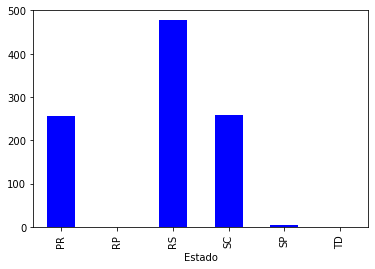

In [93]:
grupo_estados.plot.bar(color = 'blue')

In [94]:
# Agrupamento por gênero
grupo_genero = dataset.groupby(["Genero"]).size()
grupo_genero
print(f'\nExistem alguns problemas de inconsistências:'
     f'\n\n{grupo_genero}'
     f'\n\nprecisamos arrumar isso!!!!!')


Existem alguns problemas de inconsistências:

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

precisamos arrumar isso!!!!!


In [95]:
# Exploração de dados NUMÉRICOS:
# Score


score = dataset['Score']
print(f'Uma breve descrição:\n\n{score.describe()}')

Uma breve descrição:

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64


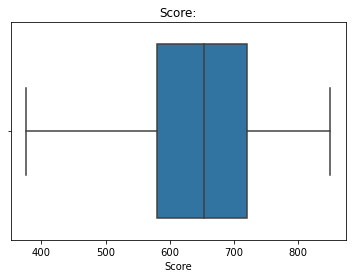

In [96]:
boxplot_score = srn.boxplot(dataset['Score']).set_title('Score:')

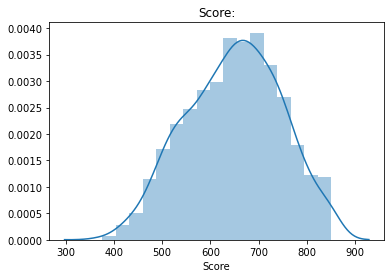

In [97]:
histograma_score = srn.distplot(dataset['Score']).set_title('Score:')

In [98]:
# Idade


Idade = dataset['Idade']
print(f'Repare nas inconsistencias:\n\n'
      f'{Idade.describe()}'
     f'\n\nErros: {min(Idade)} e {max(Idade)}')

Repare nas inconsistencias:

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Erros: -20 e 140


Text(0.5, 1.0, 'Idade')

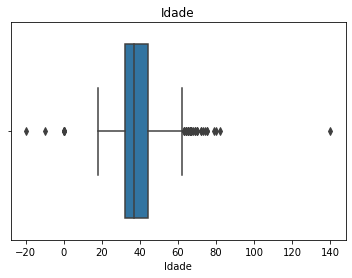

In [99]:
srn.boxplot(Idade).set_title('Idade')

Text(0.5, 1.0, 'Idade')

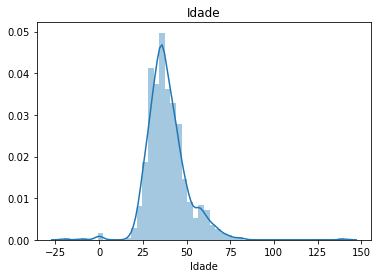

In [100]:
srn.distplot(Idade).set_title('Idade')

In [101]:
# Saldo

saldo = dataset['Saldo']
saldo.describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

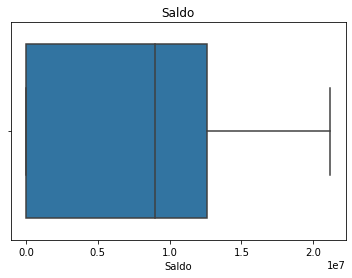

In [102]:
srn.boxplot(saldo).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

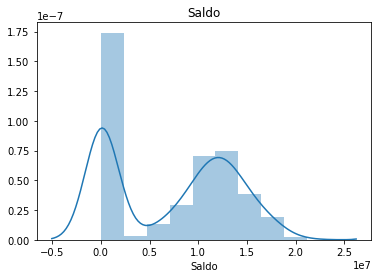

In [103]:
srn.distplot(saldo).set_title('Saldo')

In [104]:
# Salário

salario = dataset['Salario']
salario.describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

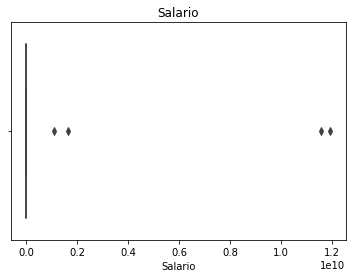

In [105]:
srn.boxplot(salario).set_title('Salario')

Text(0.5, 1.0, 'Salario')

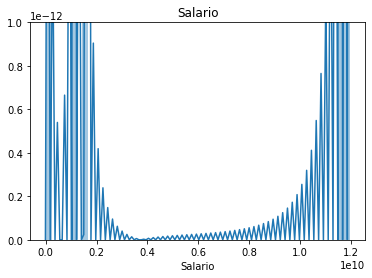

In [106]:
srn.distplot(salario).set_title('Salario')

In [107]:
# Vamos verificar se existe valores nulos (NAN)
dataset.isnull().sum()

ID             0
Score          0
Estado         0
Genero         8
Idade          0
Patrimonio     0
Saldo          0
Produtos       0
TemCredCard    0
Ativo          0
Salario        7
Saiu           0
dtype: int64

In [108]:
# Vamos começar a resolver os problemas encontrados
# Salários
# Remover NAs e substituir pela mediana

dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [109]:
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [110]:
# Substituindo NAs por Mediana
dataset['Salario'].fillna(mediana, inplace = True)

In [111]:
# Verificando o resultado
dataset['Salario'].isnull().sum()

0

In [112]:
# Resolvendo a falta de padronização e NAs em 'Genero'
# Genero
grupo_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [113]:
dataset['Genero'].isnull().sum()

8

In [114]:
dataset.groupby(['Genero']).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [115]:
# Vamos preencher com Masculino pq ele é a moda (Valor que mais ocorre)
# 'inplace' é substituir na própria variável
dataset['Genero'].fillna('Masculino', inplace = True) 

In [116]:
# Verificando novamente os NA's
dataset['Genero'].isnull().sum()

0

In [117]:
# Repare na falta de padronização:
dataset.groupby(['Genero']).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    529
dtype: int64

In [118]:
# Agora vamos padronizar
# No dataset, na col 'Genero' se valor = "M", cols Genero recebem "Masculino"
dataset.loc[dataset['Genero'] == "M", 'Genero'] = "Masculino"

# .isin([]) pega uma lista de valores dentro da lista
dataset.loc[dataset['Genero'].isin(["F","Fem"]), 'Genero'] = "Feminino"

In [119]:
# Verificando o resultado
dataset.groupby(['Genero']).size()

Genero
Feminino     464
Masculino    535
dtype: int64

In [120]:
# Idades fora do domínio
dataset["Idade"].describe()


count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [121]:
# Vendo os registros problemáticos:
dataset.loc[(dataset["Idade"] < 0 ) | (dataset["Idade"] > 120 )]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredCard,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [122]:
# Calcular a mediana pra substituir nos registros:
mediana = sts.median(dataset['Idade'])
mediana

37

In [123]:
# Substituindo valores pela mediana
dataset.loc[dataset["Idade"].isin(['-10','-20','140']), "Idade"] = mediana

In [124]:
# Verificando se existem valores ainda em não conformidade
dataset.loc[(dataset["Idade"] < 0 ) | (dataset["Idade"] > 120 )]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredCard,Ativo,Salario,Saiu


In [125]:
# Verificando se existe dados duplicados. Buscando pelo ID
dataset[dataset.duplicated(['ID'], keep = False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredCard,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [126]:
# Removendo dados duplicados
dataset.drop_duplicates(subset="ID",keep='first',inplace=True)

# Buscando novamente por dados duplicados
dataset[dataset.duplicated(['ID'], keep = False)]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredCard,Ativo,Salario,Saiu


In [127]:
# Estados fora do domínio
grupo_estados

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [128]:
dataset.loc[dataset['Estado'].isin(["RP","TD","SP"]),"Estado"] = "RS"

In [129]:
dataset.groupby(['Estado']).size()

Estado
PR    257
RS    483
SC    258
dtype: int64

In [130]:
# Outliers em Salario
# Vamos considerar 2 desvios padrão

desv = sts.stdev(dataset["Salario"])
desv

528988918.4679201

In [131]:
# Nosso desvio será igual a 2x o desvio padrao (Nossa escolha pessoal)

# Verificando se alguém atende a esse critério
dataset.loc[dataset["Salario"] >= 2 * desv]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredCard,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [132]:
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [133]:
# Atribuindo a mediana nos outlier encontrados
dataset.loc[dataset["Salario"] >= 2 * desv] = mediana

In [134]:
# Verificando se ainda há outliers
dataset.loc[dataset["Salario"] >= 2 * desv]

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredCard,Ativo,Salario,Saiu


In [135]:
dataset.head()

,ID,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCredCard,Ativo,Salario,Saiu
0,1.0,619.0,RS,Feminino,42.0,2.0,0.0,1.0,1.0,1.0,10134888.0,1.0
1,2.0,608.0,SC,Feminino,41.0,1.0,8380786.0,1.0,0.0,1.0,11254258.0,0.0
2,3.0,502.0,RS,Feminino,42.0,8.0,1596608.0,3.0,1.0,0.0,11393157.0,1.0
3,4.0,699.0,RS,Feminino,39.0,1.0,0.0,2.0,0.0,0.0,9382663.0,0.0
4,5.0,850.0,SC,Feminino,43.0,2.0,12551082.0,1.0,1.0,1.0,790841.0,0.0


In [136]:
dataset.shape

(998, 12)